# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что вовремя сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

## План работы

1. Изучение информации
2. Предобработка данных
3. Расчет основных показателей
4. Исследовательский анализ данных
5. Выводы

Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
apartments = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
apartments.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Датафрейм состоит из 23699 строк и 22 столбцов. 

Пропуски обнаружены в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Также в ряде столбцов необходимо поменять тип данных. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Данные загружены и изучены, класс

### Шаг 2. Предобработка данных

### Обработка пропусков:


#### ceiling_height

In [4]:
# Заполним пропуски в столбце с высотой потолков в зависимости от названия локации и удаленности от центра

ceil = apartments.copy()[['locality_name', 'cityCenters_nearest', 'ceiling_height']]
ceil['locality_group'] = 'Область'
ceil.loc[ceil['locality_name'] == "Санкт-Петербург", 'locality_group'] = 'Город'
ceil.loc[(ceil['locality_name'] == "Санкт-Петербург") & (ceil['cityCenters_nearest'] <= 5000), 'locality_group'] = 'Центр'
median = ceil.groupby(['locality_group']). agg({'ceiling_height':'median', 'locality_name': 'count'})
ceil['ceiling_height_new'] = ceil['ceiling_height']
for group in ceil['locality_group'].unique():
    ceil.loc[(ceil['ceiling_height'].isna()) & (ceil['locality_group'] == group), 'ceiling_height_new'] = \
    median[median.index == group]['ceiling_height'][0]
    
apartments['ceiling_height'] = ceil['ceiling_height_new']
median

,ceiling_height,locality_name
locality_group,,
Город,2.65,13655
Область,2.60,7929
Центр,3.10,2066


In [5]:
# Проверяем
apartments['ceiling_height'].isna().sum()

0

#### floors_total

In [6]:
# Заменить адекватным значением данный столбец не представляется возможным, поэтому удаляем строки с пропущенными значениями
apartments.dropna(subset = ['floors_total'],inplace = True)
# Проверяем
apartments['floors_total'].isna().sum()

0

#### living_area

In [7]:
# Находим коэффициент - отношение медианы значений жилой площади к общей площади квартир
living_total_median = apartments['living_area'].median() / apartments['total_area'].median()
living_total_median

0.5769230769230769

In [8]:
# Заполняем пропуски с использованием ранее найденного коэффициента
apartments.loc[apartments['living_area'].isna(), 'living_area'] = apartments \
                                                                                .loc[apartments['living_area'].isna(), \
                                                                                'total_area'] * living_total_median

apartments.living_area.isna().sum()

0

#### is_apartment

In [9]:
# Подавляющее большинство квартир - это не апартаменты, поэтому меняем пропущенные значения на False
apartments.is_apartment = apartments.is_apartment.fillna(value = False)
apartments.is_apartment.isna().sum()

0

#### kitchen_area

In [10]:
# Находим коэффициент - отношение медианы значений площади кухни к общей площади
kitchen_total_median = apartments['kitchen_area'].median() / apartments['total_area'].median()
kitchen_total_median

0.175

In [11]:
# Аналогично жилой площади аполняем пропуски с использованием ранее найденного коэффициента
apartments.loc[apartments['kitchen_area'].isna(), 'kitchen_area'] = apartments \
                                                                                .loc[apartments['kitchen_area'].isna(), \
                                                                                'total_area'] * kitchen_total_median

apartments.kitchen_area.isna().sum()

0

#### balcony

In [12]:
# Пропущенные значения в столбце balcony скорее всего означают отсутствие балконов, поэтому будет логично заменить их на 0
apartments.balcony = apartments.balcony.fillna(value = 0)
apartments.balcony.isna().sum()

0

#### locality_name

In [13]:
# заменить адекватным значением данный столбец не представляется возможным, поэтому удаляем строки с пропущенными значениями
apartments.dropna(subset = ['locality_name'],inplace = True)
# Проверяем
apartments['locality_name'].isna().sum()

0

In [14]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

### Замена типов данных

#### first_day_exposition

In [15]:
# Для дальнейших операций с датой и временем заменим тип столбца first_day_exposition на datetime
apartments['first_day_exposition'] = pd.to_datetime(apartments['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
apartments.first_day_exposition.head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### floors_total

In [16]:
# Для дальнейших операций с этажами преобразуем тип данных столбца floors_total в int
apartments['floors_total'] = apartments['floors_total'].astype('int')
apartments.floors_total.head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

#### last_price

In [17]:
apartments['last_price'] = apartments['last_price'].astype('int')
apartments.last_price.head()

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int64

In [18]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around

### Выводы

Заполненны пропуски в основных параметрах, которые необходимы для дальнейшего исследования. Параметр days_exposition, необходим для следующего исследования, заполнение медианой или средним значением может исказить картину, но и удалять эти значения нельзя, так как их слишком много, поэтому оставим данный столбец без изменений. Аналогично поступаем и с cityCenters_nearest. Удалены 86 строк с пропущенными значениями количества этажей в доме и 49 строк наименования населенного пункта - данные действия не должны существенно исказить картину из за своей незначительности. Параметры parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, airports_nearest не требуются для дальнешего исследования, поэтому их оставляем без изменений.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу

#### Цена за квадратный метр

In [19]:
# Посчитаем цену за квадратный метр по данной выборке
apartments['price_per_square_meter'] = apartments['last_price'] / apartments['total_area']
apartments['price_per_square_meter'].describe()

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118349e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_per_square_meter, dtype: float64

#### День недели, месяц и год публикации объявления

In [20]:
# Получим столбец года побликации объявления
apartments['first_day_exposition_year'] = pd.DatetimeIndex(apartments['first_day_exposition']).year
# Получим столбец месяца побликации объявления
apartments['first_day_exposition_month'] = pd.DatetimeIndex(apartments['first_day_exposition']).month
# Получим столбец дня недели побликации объявления
apartments['first_day_exposition_weekday'] = apartments['first_day_exposition'].dt.weekday

apartments[['first_day_exposition','first_day_exposition_year', 'first_day_exposition_month','first_day_exposition_weekday']]

,first_day_exposition,first_day_exposition_year,first_day_exposition_month,first_day_exposition_weekday
0,2019-03-07,2019,3,3
1,2018-12-04,2018,12,1
2,2015-08-20,2015,8,3
3,2015-07-24,2015,7,4
4,2018-06-19,2018,6,1
...,...,...,...,...
23694,2017-03-21,2017,3,1
23695,2018-01-15,2018,1,0
23696,2018-02-11,2018,2,6
23697,2017-03-28,2017,3,1


#### Категоризация этажей

In [21]:
# Разобъем этажи на группы "первый", "последний", "другой"
apartments['floor_type'] = 'другой'
apartments.loc[apartments['floor'] == 1, 'floor_type'] = 'первый'
apartments.loc[apartments['floor'] == apartments['floors_total'], 'floor_type'] = 'последний'
apartments[['floors_total', 'floor', 'floor_type']]
apartments['floor_type'].value_counts()

другой       17326
последний     3355
первый        2884
Name: floor_type, dtype: int64

#### Отношение жилой и общей площади, а также отношение площади кухни к общей

In [22]:
# Находим отношение жилой к общей площади
apartments['living_area_to_total_area'] = apartments['living_area'] / apartments['total_area']
apartments.living_area_to_total_area.describe()

count    23565.000000
mean         0.565886
std          0.101108
min          0.021583
25%          0.500000
50%          0.576923
75%          0.631732
max          1.000000
Name: living_area_to_total_area, dtype: float64

In [23]:
# Находим отношение площади кухни к общей площади
apartments['kitchen_area_to_total_area'] = apartments['kitchen_area'] / apartments['total_area']
apartments[['total_area', 'living_area', 'kitchen_area', 'living_area_to_total_area', 'kitchen_area_to_total_area']]
apartments.kitchen_area_to_total_area.describe()

count    23565.000000
mean         0.186176
std          0.069546
min          0.025381
25%          0.136738
50%          0.175000
75%          0.223881
max          0.787879
Name: kitchen_area_to_total_area, dtype: float64

#### Промежуточные выводы

Большая часть объявлений из 2017, 2018 года. В будни размещают в 2 раза больше объявлений, нежели в выходные. Три четверти выборки - это квартиры не первый и не последний этаж, объявлений с квартирами на первом этаже и последнем примерно поровну. Жилая часть по медиане занимает 57.7% от общей площади квартиры, площадь кухни 17.5% от общей площади.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

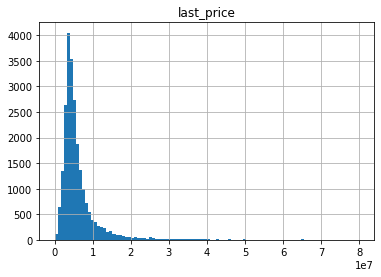

In [24]:
# Построим гистограмму последней цены квартир
apartments.hist('last_price', bins=100, range = (0, 80000000))
plt.show()

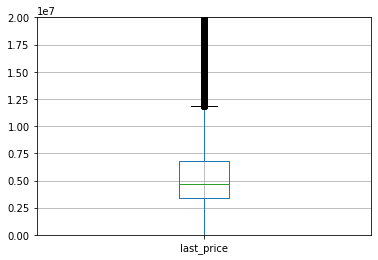

In [25]:
plt.ylim(0, 20000000)
apartments.boxplot(column='last_price')
plt.show()

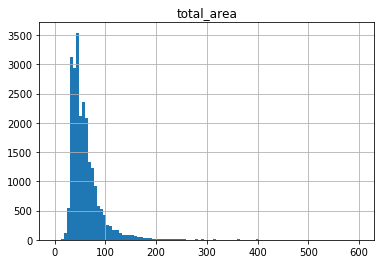

In [26]:
# Построим гистограмму площади квартир
apartments.hist('total_area', bins=100, range = (0, 600))
plt.show()

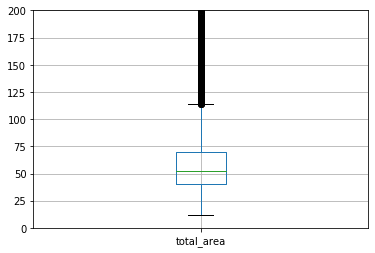

In [27]:
plt.ylim(0, 200)
apartments.boxplot(column='total_area')
plt.show()

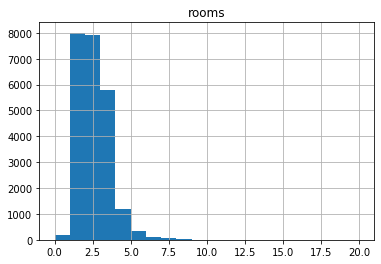

In [28]:
# Построим гистограмму количества комнат в квартирах
apartments.hist('rooms', bins=20, range = (0, 20))
plt.show()

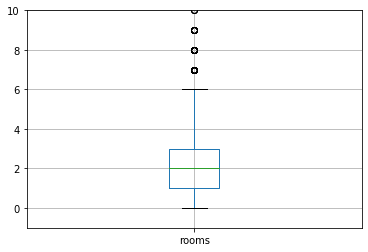

In [29]:
plt.ylim(-1, 10)
apartments.boxplot(column='rooms')
plt.show()

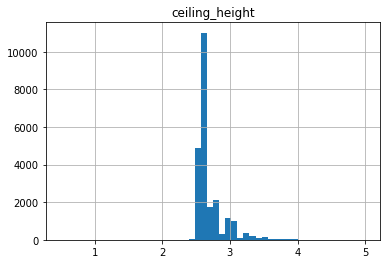

In [30]:
# Построим гистограмму высоты потолков в квартирах
apartments.hist('ceiling_height', bins=50, range = (0.5, 5))
plt.show()

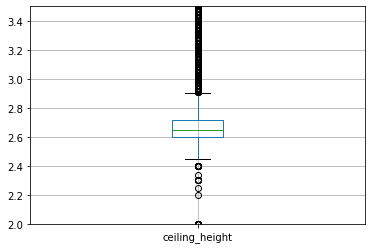

In [31]:
plt.ylim(2, 3.5)
apartments.boxplot(column='ceiling_height')
plt.show()

#### Промежуточный вывод

Гистограммы цены и площади квартир при первом взгляде похожи на нормальное распределение с длинным хвостом. Гистограммы комнат и высоты потолков не имеют ярко выраженной формы, выделяются квартиры с высотой потолков около 2,7 м, а также однокомнатные, двухкомнатные и трехкомнатные квартиры.

#### Время продажи квартиры

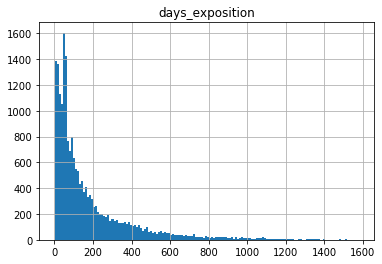

In [32]:
# Построим гистограмму колличества дней размещения объявления в квартирах
apartments.hist('days_exposition', bins=150)
plt.show()

In [33]:
apartments.days_exposition.describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [34]:
# Посчитаем медиану
days_exposition_mean = apartments.days_exposition.median()
days_exposition_mean

95.0

In [35]:
# Посчитаем среднее значение
days_exposition_mean = apartments.days_exposition.mean()
days_exposition_mean

180.7413945278023

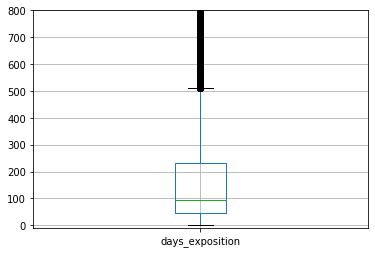

In [36]:
plt.ylim(-10, 800)
apartments.boxplot(column='days_exposition')
plt.show()

#### Промежуточные выводы

Обычное время продажи квартиры составляет от 45 до 500 дней, соответственно можно считать, что продажа быстрее 45 дней совершена достаточно быстро, а если объявление висит более 500 дней, то необычно долго.

#### Убираем редкие и выбивающиеся значения

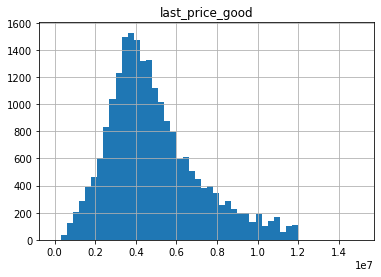

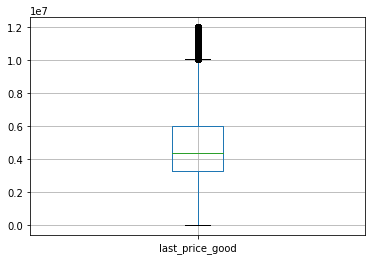

In [37]:
# Установим верхнюю границу по цене на уровне 12 млн и посмотрим как изменится гистограмма
apartments['last_price_good'] = apartments.loc[apartments['last_price'] < 12000000, 'last_price']
apartments.hist('last_price_good', bins=50, range = (0, 15000000))
plt.show()
apartments.boxplot('last_price_good')
plt.show()

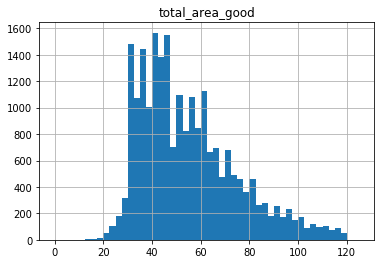

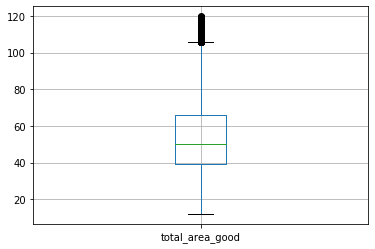

In [38]:
# Установим верхнюю границу по площади квартир на уровне 120 кв м и посмотрим как изменится гистограмма
apartments['total_area_good'] = apartments.loc[apartments['total_area'] < 120, 'total_area']
apartments.hist('total_area_good', bins=50, range = (0, 125))
plt.show()
apartments.boxplot('total_area_good')
plt.show()

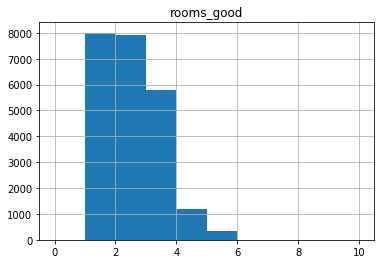

In [39]:
# Установим верхнюю границу по количеству комнат в квартире на уровне от 1 до 6 и посмотрим как изменится гистограмма
apartments['rooms_good'] = apartments.loc[(apartments['rooms'] < 6) & (apartments['rooms'] > 0), 'rooms']
apartments.hist('rooms_good', bins=10, range = (0, 10))
plt.show()

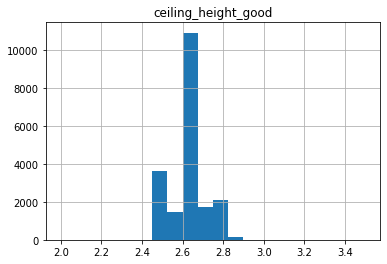

In [40]:
# Установим нижнуюю границу высоты потолков на уровне 2.45 м
# А верхнюю границу на уровне 2.9 м посмотрим как изменится гистограмма
apartments['ceiling_height_good'] = apartments.loc[(apartments['ceiling_height'] > 2.45) \
                                                   & (apartments['ceiling_height'] < 2.9), 'ceiling_height']
apartments.hist('ceiling_height_good', bins=20, range = (2, 3.5))
plt.show()

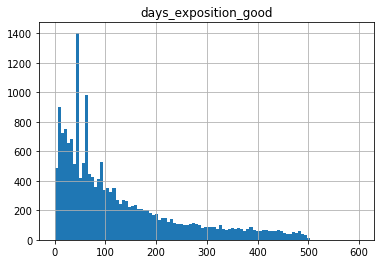

count    18652.000000
mean       126.907088
std        119.100398
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition_good, dtype: float64

In [41]:
# Установим верхнюю границу по дням размещения объявления на уровне 500 дней и посмотрим как изменится гистограмма
apartments['days_exposition_good'] = apartments.loc[apartments['days_exposition'] < 500, 'days_exposition']
apartments.hist('days_exposition_good', bins=100, range = (0, 600))
plt.show()
apartments.days_exposition_good.describe()

#### Вывод

Мы обрезали "хвосты" с помощью графика boxplot. Обращают на себя внимание пики в количестве дней продажи в раоне 45 и 55 дней.

#### Какие факторы больше всего влияют на стоимость квартиры?

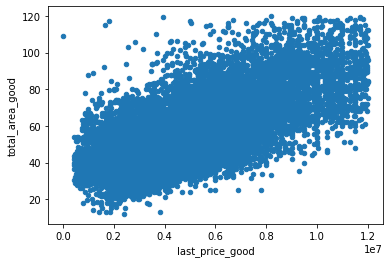

In [42]:
# Строим график зависимости цены и метража квартиры
apartments.plot(x='last_price_good', y='total_area_good', kind='scatter')
plt.show()

In [43]:
# Находим коэффициент корреляции между ценой и площади квартиры 
apartments.last_price_good.corr(apartments.total_area_good)

0.6993102926153292

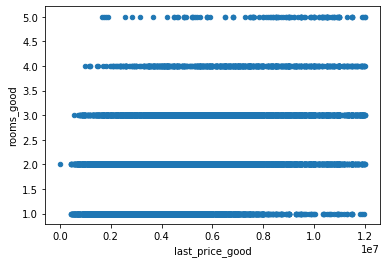

In [44]:
# Строим график зависимости цены и числа комнат
apartments.plot(x='last_price_good', y='rooms_good', kind='scatter')
plt.show()

In [45]:
# Находим коэффициент корреляции между ценой и количеством комнат 
apartments.last_price_good.corr(apartments.rooms_good)

0.4459096792758982

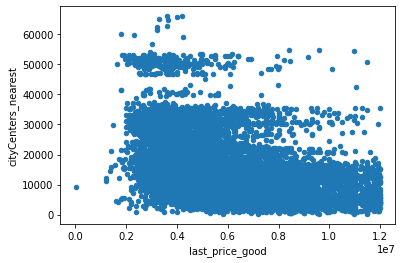

In [46]:
# Строим график зависимости цены и удаленности от центра
apartments.plot(x='last_price_good', y='cityCenters_nearest', kind='scatter')
plt.show()

In [47]:
# Находим коэффициент корреляции между ценой и удаленности от центра
apartments.last_price_good.corr(apartments.cityCenters_nearest)

-0.34578714313963654

In [48]:
# Найдем как квартиры в центре коррелируют с количеством высотой потолков
apartments.last_price_good.corr(apartments.ceiling_height_good)

0.31949897913156994

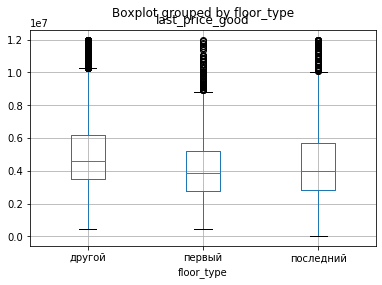

In [49]:
# Строим график зависимости цены и типа этажа
apartments.boxplot(column='last_price_good', by='floor_type')
plt.show()

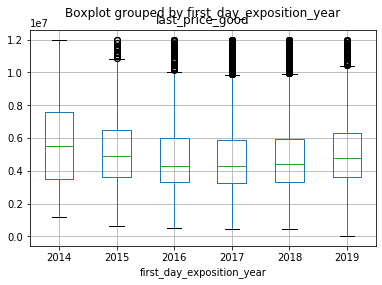

In [50]:
# Строим график зависимости цены и года размещения
apartments.boxplot(column='last_price_good', by='first_day_exposition_year')
plt.show()

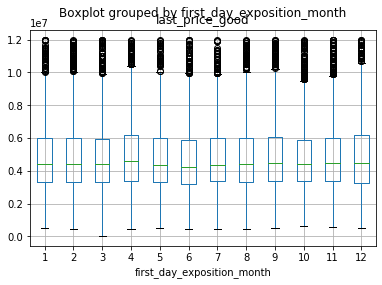

In [51]:
# Строим график зависимости цены и месяца размещения
apartments.boxplot(column='last_price_good', by='first_day_exposition_month')
plt.show()

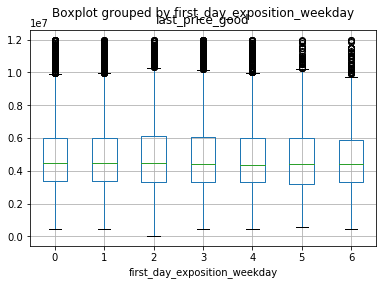

In [52]:
# Строим график зависимости цены и дня недели размещения
apartments.boxplot(column='last_price_good', by='first_day_exposition_weekday')
plt.show()

#### Вывод

Цена достаточно сильно коррелирует с площадью квартир. Зависимость от количества комнат тоже есть, но она не сильная. Идет обратная корреляция от расстояния от центра, что не удивительно, чем ближе к центру, тем выше цена, но зависимость опять же не слишком сильная. Квартиры на "других" этажах в среднем чуть дороже, чем на первом и последнем этаже. С 2014 года по 2017 наблюдалось падение цен на недвижимость, с 2018 идет небольшой рост.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

#### Выберите 10 населённых пунктов с наибольшим числом объявлений

In [53]:
# Топ 10 населенных пунктов с наибольшим числом объявлений
top_locality_name1 = apartments.locality_name.value_counts().head(10)
top_locality_name1

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [54]:
# Цена за квадратный метр в основных населенных пунктах
apartments['top_locality_name'] = apartments.loc[apartments['locality_name'].isin(top_locality_name1.index), 'locality_name']
apartments.pivot_table(index='top_locality_name', values='price_per_square_meter') \
                        .sort_values(by='price_per_square_meter', ascending = False)

,price_per_square_meter
top_locality_name,
Санкт-Петербург,114868.877341
Пушкин,103125.819291
деревня Кудрово,92473.547576
посёлок Парголово,90175.913458
посёлок Мурино,85673.259928
посёлок Шушары,78551.344545
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


#### Вывод

Самая высокая стоимость жилья в Санк-Петербурге(областной центр) и Пушкине(престижный район, московское направление), а самая низкая стоимость в Выборге(сильная удаленность от областного центра).

#### Изучим предложения квартир

In [55]:
# Переведем метры в километры
apartments['cityCenters_nearest_spb_km'] = (apartments.loc[apartments['locality_name'] \
                                    == "Санкт-Петербург",'cityCenters_nearest']/1000).round()
apartments['cityCenters_nearest_spb_km']

0        16.0
1         NaN
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_spb_km, Length: 23565, dtype: float64

In [56]:
# Посчитаем среднюю цену для каждого километра
apartments['price_per_km_spb_mean'] = apartments['last_price_good'] / apartments['cityCenters_nearest_spb_km']
apartments['price_per_km_spb_mean'].round()

0              NaN
1              NaN
2         371143.0
3              NaN
4        1250000.0
           ...    
23694    2425000.0
23695          NaN
23696          NaN
23697    1147500.0
23698          NaN
Name: price_per_km_spb_mean, Length: 23565, dtype: float64

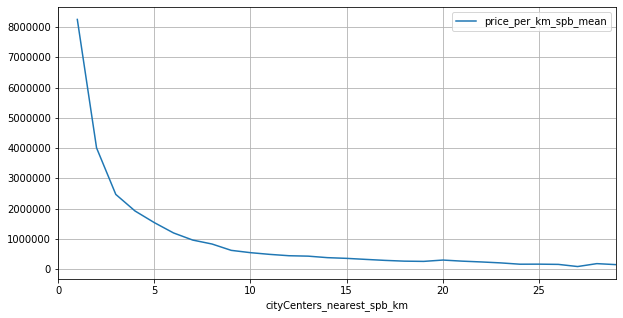

In [57]:
# Построим графики зависимости цены за квдратный метр от удаленности от центра
apartments.pivot_table(index='cityCenters_nearest_spb_km', values='price_per_km_spb_mean').plot(grid=True, figsize=(10, 5))
plt.show()

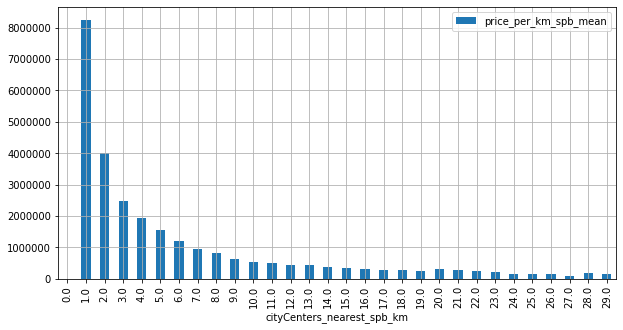

In [58]:
apartments.pivot_table(index='cityCenters_nearest_spb_km', values='price_per_km_spb_mean') \
                                                         .plot(kind='bar', grid=True, figsize=(10, 5))
plt.show()

#### Вывод

Центром можно считать область до 9 км от центра. Далее цены уже стабилизируются. 

#### Анализ сегмента квартир в центре

In [59]:
# Сделаем срез по квартирам удаленностью не более 9 км от центра
apartments_center = apartments.query('cityCenters_nearest_spb_km < 9')

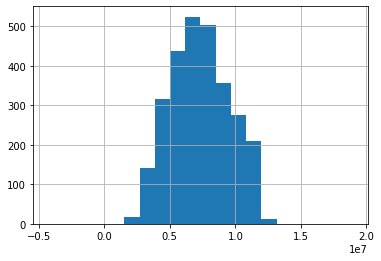

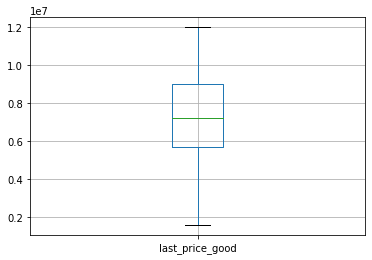

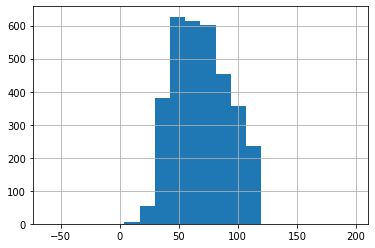

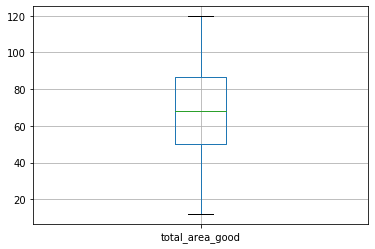

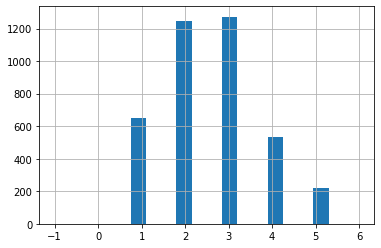

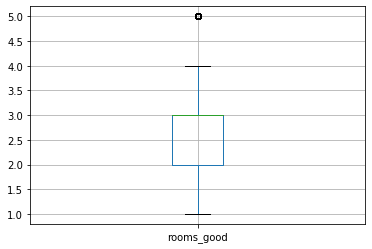

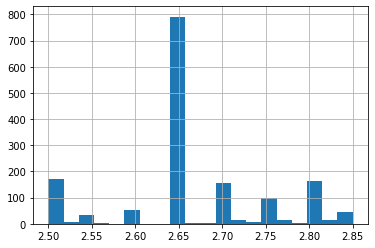

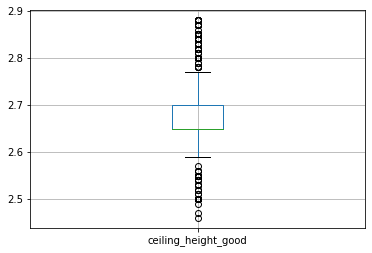

In [60]:
# Построим гисторграммы зависимости цены, площади, числа комнат и высоты потолков
select_columns = apartments_center.loc[:, ('last_price_good', 'total_area_good', 'rooms_good', 'ceiling_height_good')]
for col in select_columns:
    params = select_columns[[col]].describe().T
    q1, q3 = params['25%'][0], params['75%'][0]
    iqr = q3 - q1
    select_columns[col].hist(range=(q1 - 3 * iqr, q3 + 3 * iqr), bins=20)
    plt.show()
    select_columns.boxplot(col)
    plt.show()

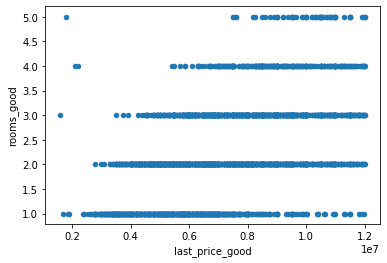

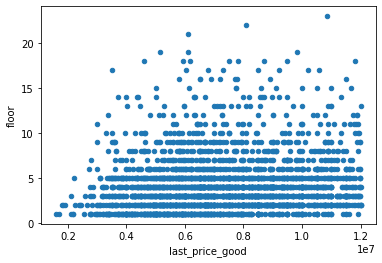

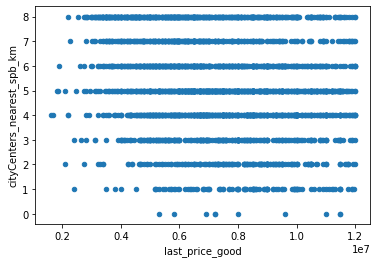

In [61]:
# Построим графики зависимости цены от числа комнат, этажа, удаленности от центра 
select_columns_per_price = apartments_center.loc[:, ('rooms_good', 'floor', 'cityCenters_nearest_spb_km')]
for col in select_columns_per_price:
    apartments_center.plot(x='last_price_good', y=col, kind='scatter')
    plt.show()

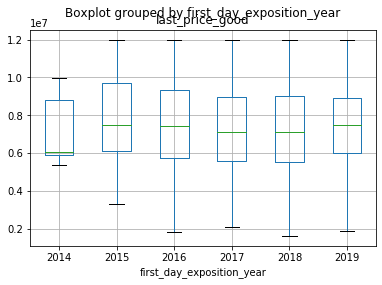

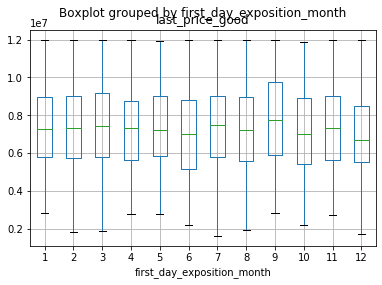

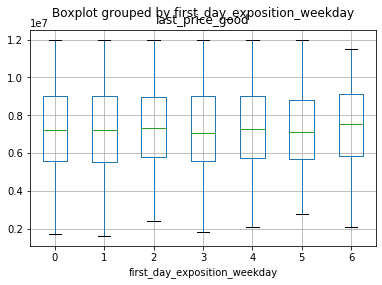

In [62]:
# Построим графики зависимости цены от года, месяца и дня недели размещения объявления 
select_columns_date = apartments_center.loc[:, ('first_day_exposition_year',
                                         'first_day_exposition_month',
                                         'first_day_exposition_weekday'
                                        )]
for col in select_columns_date:
    params = select_columns_date[[col]].describe().T
    q1, q3 = params['25%'][0], params['75%'][0]
    iqr = q3 - q1
    apartments_center.boxplot(column='last_price_good', by=col)
    plt.show()

In [63]:
# Найдем как квартиры в центре коррелируют с площадью
apartments_center.last_price_good.corr(apartments.total_area_good)

0.7152900222778386

In [64]:
# Найдем как квартиры в центре коррелируют с количеством комнат
apartments_center.last_price_good.corr(apartments.rooms_good)

0.4834894977158795

In [65]:
# Найдем как квартиры в центре коррелируют с количеством высотой потолков
apartments_center.last_price_good.corr(apartments.ceiling_height_good)

0.25650384156589384

#### Вывод

Корреляция стоимости квартир в центре с такими праметрами как площадь, кол-во комнат и высота потолков практически такая же как и у остальных квартир по выборке. В центре более популярны двушки и трешки, вместо однушек и двушек по выборке. Медиана стоимости квартир находится в районе 7 млн, вместо 4.5 млн по выборке в целом, медиана площади также выше - 70 кв м, вместо 50 кв м по выборке. Интересная особенность, что в 2014 году стоимость жилья в центре была существенно ниже, чем в последующих годах.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Просто класс! Очень здорово и детально, работа проделана колоссальная, продолжай в том же духе


### Шаг 5. Общий вывод

Основной параметр, влияющий на стоимость квартир - это их площадь. Зависимость цены от количества от комнат прослеживается, но она менее сильная. Высота потолков также не сильно сказывается на цене квартиры. Удаленность от центра влияет на стоимость примерно также, как и выстота потолков. Медианное значение скорости продажи квартир 95 дней. Быстрая продажа квартиры - менее 45 дней, необычно долгая - более 500 дней. Жилая часть по медиане занимает 57.7% от общей площади квартиры, площадь кухни 17.5% от общей площади. Квартиры на последнем и первом этаже менее дорогостоящие, чем на других этажах. Помимо Санкт-Петербурга, самые популярные локации с продажей квартиры - это посёлки Мурино и Шушары, что не удивительно, последние годы идет их активная застройка новым жельем. Цетром можно считать квартиры в радиусе 9 км. Цены на жилье падали с 2014 по 2017 год, с 2018 цены опять пошли вверх, в центре же жилье сильно подскочило в цене с 2015 года и держится на стабильном уровне. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Точные и обоснованные выводы, супер)

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)